## **Wine Quality Prediction**

## **Import the Dependencies**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **Data Collection and Processing**

In [2]:
# Loading the dataset
wine_dataset = pd.read_csv('winequality-red.csv')
# Displaying the first few rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Checking the shape of the dataset
wine_dataset.shape

(1599, 12)

In [4]:
# Viewing the dataset's information (data types, non-null counts)
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Checking for missing values in the dataset
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
# Descriptive statistics for the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Counting the number of records for each quality level
wine_dataset['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


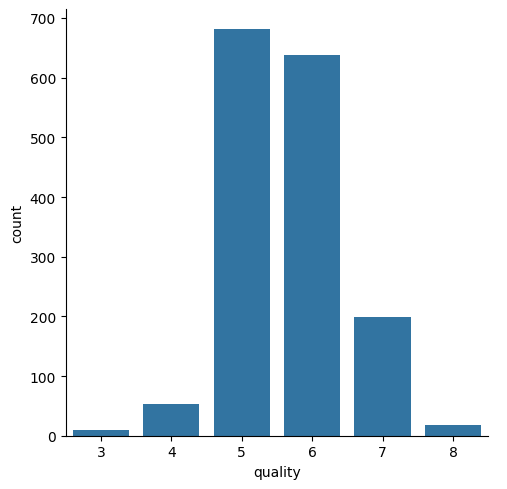

In [8]:
# Visualizing the distribution of wine quality
sns.catplot(x='quality', data=wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

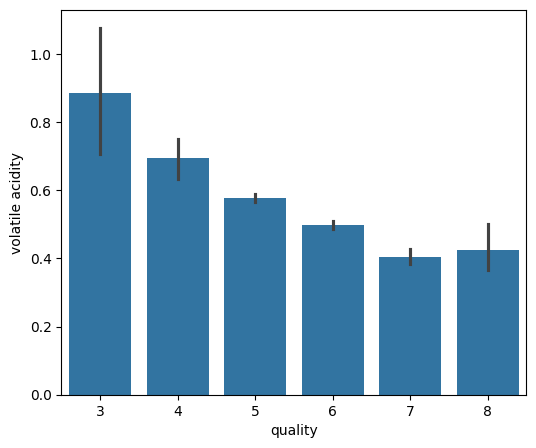

In [9]:
# Bar plots for different features against quality
plot = plt.figure(figsize=(6,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

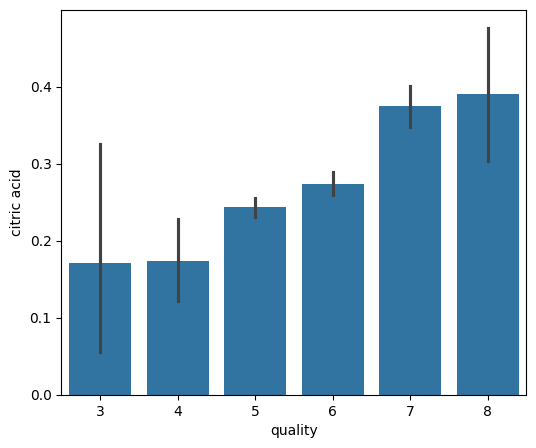

In [10]:
plot = plt.figure(figsize=(6,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

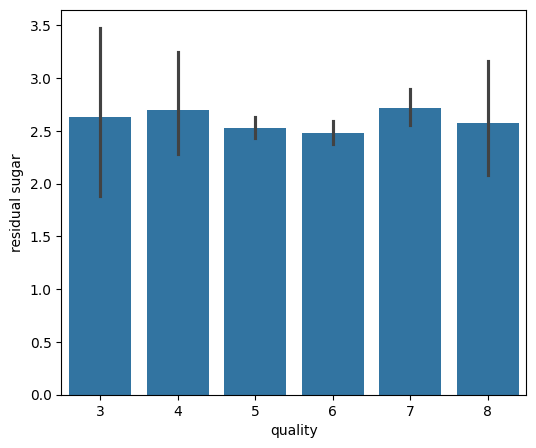

In [11]:
plot = plt.figure(figsize=(6,5))
sns.barplot(x='quality', y='residual sugar', data=wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

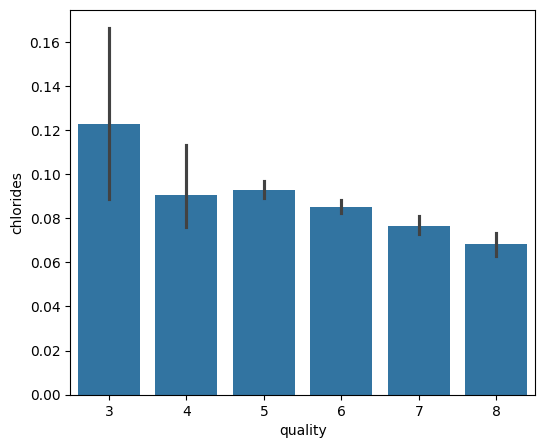

In [12]:
plot = plt.figure(figsize=(6,5))
sns.barplot(x='quality', y='chlorides', data=wine_dataset)

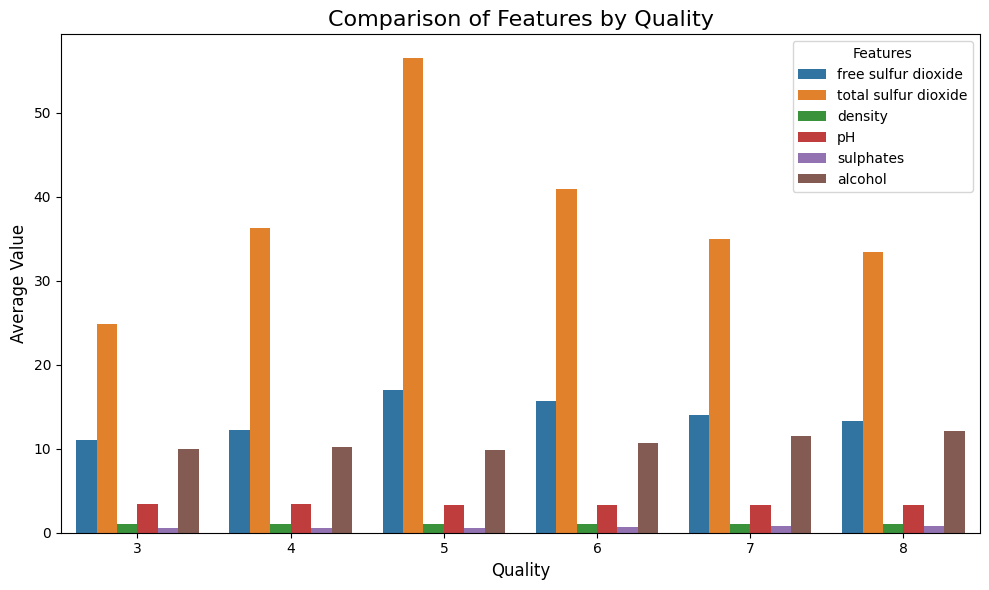

In [13]:
# Analyzing features grouped by quality
features = ['free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol']
grouped_data = wine_dataset.groupby('quality')[features].mean().reset_index()

# Transforming data for grouped bar plot
melted_data = grouped_data.melt(id_vars='quality', var_name='Feature', value_name='Value')

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='Value', hue='Feature', data=melted_data)

# Customize plot
plt.title('Comparison of Features by Quality', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Features', loc='upper right')
plt.tight_layout()
plt.show()


In [14]:
# Correlation matrix
correlation = wine_dataset.corr()

<Axes: >

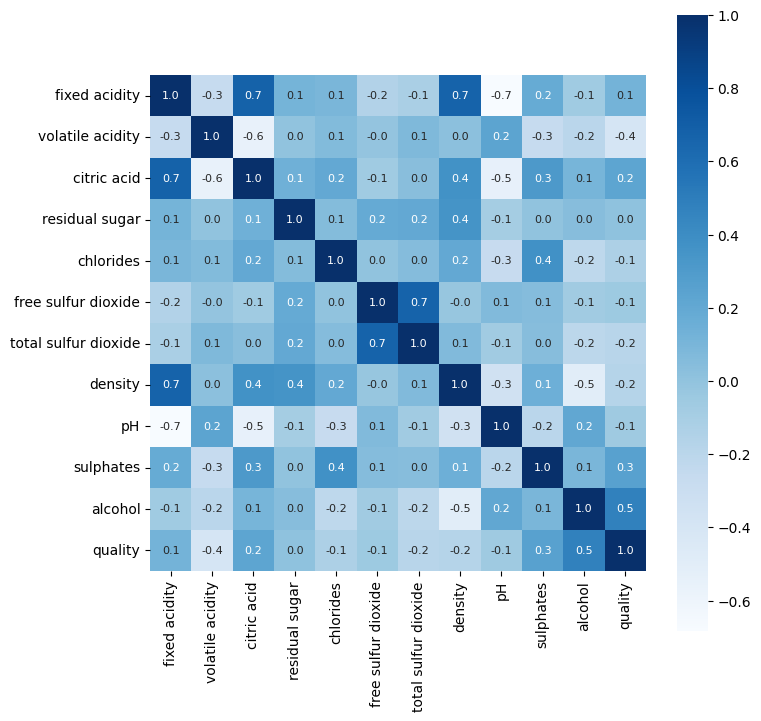

In [15]:
# Visualizing the correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
# Splitting dataset into features (X) and target (y)
X = wine_dataset.iloc[:,:-1]

In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
# Splitting data into training and testing sets
y = wine_dataset['quality'].apply(lambda y_val : 1 if y_val>=7 else 0)

In [23]:
y.head(10)

,quality
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


## **Splitting the data into Train and Test**

In [24]:
# Checking the shapes of datasets after the split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [26]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


## **Model Training**
Training the RandomForest Model

In [27]:
# Initializing the Random Forest model
model = RandomForestClassifier()

In [28]:
# Training the model with training data
model.fit(X_train, y_train)

RandomForestClassifier()

## **Model Evaluation**
Evaluating the RandomForest Model

In [33]:
# Evaluating model performance on training data
y_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train_pred, y_train)
print('Accuracy Score of Training Data:',training_data_accuracy)

Accuracy Score of Training Data: 1.0


In [34]:
# Evaluating model performance on testing data
y_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(y_test_pred, y_test)
print('Accuracy Score of Test Data:',testing_data_accuracy)

Accuracy Score of Test Data: 0.921875


## **Predictive System**

In [37]:
# Making predictions for new input data
input_data = (7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5)
input_array = np.asarray(input_data)
input_data_reshape = input_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)
if prediction[0] == 1:
  print('Good')
else:
  print('Bad')

[1]
Good


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
